In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data1_path = r"/kaggle/input/SolarEnergy/SolarPrediction.csv"
df1 = pd.read_csv(data1_path)
df2 = pd.concat(
    map(pd.read_csv, [r'/kaggle/input/energy-consumption-time-series-dataset/KwhConsumptionBlower78_1.csv',r'/kaggle/input/energy-consumption-time-series-dataset/KwhConsumptionBlower78_2.csv', r'/kaggle/input/energy-consumption-time-series-dataset/KwhConsumptionBlower78_3.csv']), ignore_index=True)

In [3]:
df1.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


In [4]:
df2.describe()

,Unnamed: 0,Consumption
count,3606.000000,3606.000000
mean,29431.899334,2.781508
std,40122.323795,2.961248
min,0.000000,0.000000
25%,450.250000,0.948000
50%,1172.500000,1.032000
75%,78986.750000,4.005500
max,98038.000000,27.284000


In [5]:
df1.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [6]:
df2.head()

,Unnamed: 0,TxnDate,TxnTime,Consumption
0,76229,01 Jan 2022,16:55:52,1.010
1,76258,01 Jan 2022,21:45:29,0.908
2,76287,01 Jan 2022,12:24:52,0.926
3,76316,01 Jan 2022,04:07:36,0.928
4,76345,01 Jan 2022,06:52:25,0.916


In [7]:
df1['Year'] = pd.DatetimeIndex(df1['Data']).year
df1['Month'] = pd.DatetimeIndex(df1['Data']).month
df1['Day'] = pd.DatetimeIndex(df1['Data']).day
df1.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Year,Month,Day
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,2016,9,29
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,2016,9,29
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,2016,9,29
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,2016,9,29
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,2016,9,29


In [8]:
df1['Hour'] = pd.DatetimeIndex(df1['Time']).hour
df1['Minute'] = pd.DatetimeIndex(df1['Time']).minute
df1['Second'] = pd.DatetimeIndex(df1['Time']).second
df1.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Year,Month,Day,Hour,Minute,Second
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,2016,9,29,23,55,26
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,2016,9,29,23,50,23
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,2016,9,29,23,45,26
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,2016,9,29,23,40,21
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,2016,9,29,23,35,24


In [9]:
df1['SunPerDay'] = pd.DatetimeIndex(df1['TimeSunSet']) - pd.DatetimeIndex(df1['TimeSunRise'])
df1['SunPerDayHours'] = pd.DatetimeIndex(df1['TimeSunSet']).hour - pd.DatetimeIndex(df1['TimeSunRise']).hour 
df1.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Year,Month,Day,Hour,Minute,Second,SunPerDay,SunPerDayHours
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,2016,9,29,23,55,26,0 days 12:00:00,12
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,2016,9,29,23,50,23,0 days 12:00:00,12
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,2016,9,29,23,45,26,0 days 12:00:00,12
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,2016,9,29,23,40,21,0 days 12:00:00,12
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,2016,9,29,23,35,24,0 days 12:00:00,12


In [10]:
df1.drop('Time', axis = 1, inplace=True)
df1.drop('Data', axis = 1, inplace=True)
df1.drop('TimeSunRise', axis = 1, inplace=True)
df1.drop('TimeSunSet', axis = 1, inplace=True)
df1.drop('SunPerDay', axis = 1, inplace=True)

In [11]:
df1.head()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Year,Month,Day,Hour,Minute,Second,SunPerDayHours
0,1475229326,1.21,48,30.46,59,177.39,5.62,2016,9,29,23,55,26,12
1,1475229023,1.21,48,30.46,58,176.78,3.37,2016,9,29,23,50,23,12
2,1475228726,1.23,48,30.46,57,158.75,3.37,2016,9,29,23,45,26,12
3,1475228421,1.21,48,30.46,60,137.71,3.37,2016,9,29,23,40,21,12
4,1475228124,1.17,48,30.46,62,104.95,5.62,2016,9,29,23,35,24,12


In [12]:
df2['Year'] = pd.DatetimeIndex(df2['TxnDate']).year
df2['Month'] = pd.DatetimeIndex(df2['TxnDate']).month
df2['Day'] = pd.DatetimeIndex(df2['TxnDate']).day
df2.head()

,Unnamed: 0,TxnDate,TxnTime,Consumption,Year,Month,Day
0,76229,01 Jan 2022,16:55:52,1.010,2022,1,1
1,76258,01 Jan 2022,21:45:29,0.908,2022,1,1
2,76287,01 Jan 2022,12:24:52,0.926,2022,1,1
3,76316,01 Jan 2022,04:07:36,0.928,2022,1,1
4,76345,01 Jan 2022,06:52:25,0.916,2022,1,1


In [13]:
df2['Hour'] = pd.DatetimeIndex(df2['TxnTime']).hour
df2['Minute'] = pd.DatetimeIndex(df2['TxnTime']).minute
df2['Second'] = pd.DatetimeIndex(df2['TxnTime']).second
df2.head()

,Unnamed: 0,TxnDate,TxnTime,Consumption,Year,Month,Day,Hour,Minute,Second
0,76229,01 Jan 2022,16:55:52,1.010,2022,1,1,16,55,52
1,76258,01 Jan 2022,21:45:29,0.908,2022,1,1,21,45,29
2,76287,01 Jan 2022,12:24:52,0.926,2022,1,1,12,24,52
3,76316,01 Jan 2022,04:07:36,0.928,2022,1,1,4,7,36
4,76345,01 Jan 2022,06:52:25,0.916,2022,1,1,6,52,25


In [14]:
df2.drop('Unnamed: 0', axis = 1, inplace=True)
df2.drop('TxnDate', axis = 1, inplace=True)
df2.drop('TxnTime', axis = 1, inplace=True)
df2.head()

,Consumption,Year,Month,Day,Hour,Minute,Second
0,1.010,2022,1,1,16,55,52
1,0.908,2022,1,1,21,45,29
2,0.926,2022,1,1,12,24,52
3,0.928,2022,1,1,4,7,36
4,0.916,2022,1,1,6,52,25


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Radiation               32686 non-null  float64
 2   Temperature             32686 non-null  int64  
 3   Pressure                32686 non-null  float64
 4   Humidity                32686 non-null  int64  
 5   WindDirection(Degrees)  32686 non-null  float64
 6   Speed                   32686 non-null  float64
 7   Year                    32686 non-null  int64  
 8   Month                   32686 non-null  int64  
 9   Day                     32686 non-null  int64  
 10  Hour                    32686 non-null  int64  
 11  Minute                  32686 non-null  int64  
 12  Second                  32686 non-null  int64  
 13  SunPerDayHours          32686 non-null  int64  
dtypes: float64(4), int64(10)
memory usage:

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3606 entries, 0 to 3605
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  3606 non-null   float64
 1   Year         3606 non-null   int64  
 2   Month        3606 non-null   int64  
 3   Day          3606 non-null   int64  
 4   Hour         3606 non-null   int64  
 5   Minute       3606 non-null   int64  
 6   Second       3606 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 197.3 KB


In [17]:
from sklearn.preprocessing import MinMaxScaler
minMax_scaler = MinMaxScaler()
df1.iloc[:,1:7] = minMax_scaler.fit_transform(df1.iloc[:,1:7])

In [18]:
from sklearn.preprocessing import MinMaxScaler
minMax_scalers = MinMaxScaler()
new_col = df2["Consumption"]
new_col = np.expand_dims(new_col,axis=1)
new_col = minMax_scalers.fit_transform(new_col)
df2["Consumption"] = new_col

In [19]:
df2.tail()

,Consumption,Year,Month,Day,Hour,Minute,Second
3601,0.037385,2022,2,28,22,1,52
3602,0.034746,2022,2,28,8,54,15
3603,0.033426,2022,2,28,6,26,48
3604,0.038997,2022,2,28,3,21,12
3605,0.035772,2022,2,28,18,38,23


Text(0.5, 1.0, 'Temperature')

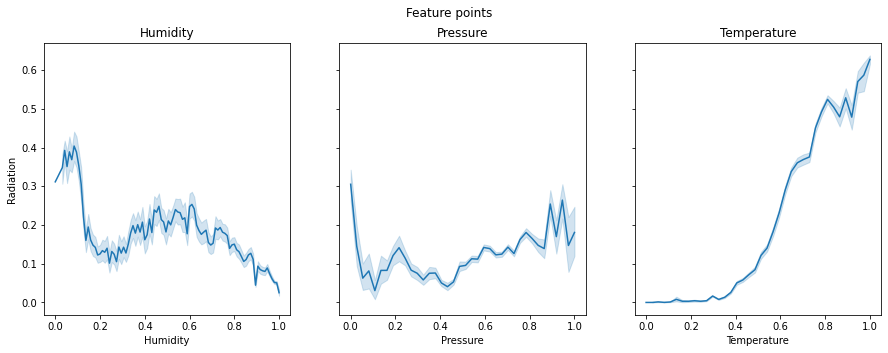

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Feature points')
sns.lineplot(ax=axes[0],x=df1["Humidity"].values,y=df1["Radiation"].values,data=df1)
axes[0].set(xlabel='Humidity', ylabel = 'Radiation')
axes[0].set_title(df1['Humidity'].name)

sns.lineplot(ax=axes[1],x=df1["Pressure"].values,y=df1["Radiation"].values,data=df1)
axes[1].set(xlabel='Pressure', ylabel = 'Radiation')
axes[1].set_title(df1['Pressure'].name)

sns.lineplot(ax=axes[2],x=df1["Temperature"].values,y=df1["Radiation"].values,data=df1)
axes[2].set(xlabel='Temperature', ylabel = 'Radiation')
axes[2].set_title(df1['Temperature'].name)


<AxesSubplot:>

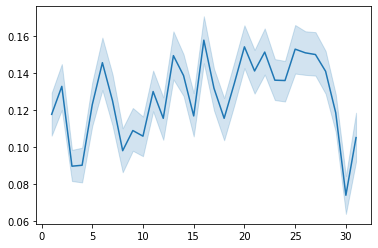

In [21]:
sns.lineplot(data=df1,x=df1["Day"].values,y=df1["Radiation"].values)

<AxesSubplot:>

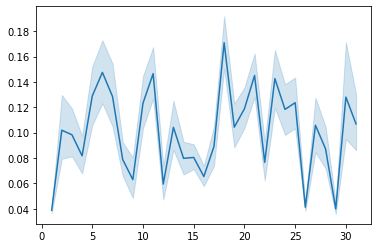

In [22]:
sns.lineplot(data=df2,x=df2["Day"].values,y=df2["Consumption"].values)